In [1]:
from data_preprocess.four_channel_data_preprocessing import create_preprocessor

In [2]:
import sys
import os

sys.path.append(os.getcwd()) 

In [5]:
import warnings
warnings.filterwarnings("ignore")

# create a preprocessor instance for the USA segmentation dataset
preprocessor = create_preprocessor("USA_segmentation")

# load the dataset
preprocessor.load_and_preprocess_dataset()

# create stratified splits
splits = preprocessor.create_stratified_splits()

# display a single sample from the dataset
# image, mask = preprocessor.load_sample_by_index(0)
# aug_image, aug_mask = preprocessor.apply_augmentation(image, mask)

INFO:data_preprocess.four_channel_data_preprocessing:Initialized DeadTreeDataPreprocessor with:
INFO:data_preprocess.four_channel_data_preprocessing:  Dataset root: USA_segmentation
INFO:data_preprocess.four_channel_data_preprocessing:  Random seed: 42
INFO:data_preprocess.four_channel_data_preprocessing:  Stratification bins: 4
INFO:data_preprocess.four_channel_data_preprocessing:Starting dataset loading and preprocessing...
INFO:data_preprocess.four_channel_data_preprocessing:Dataset structure verification passed
INFO:data_preprocess.four_channel_data_preprocessing:Found 444 RGB files
INFO:data_preprocess.four_channel_data_preprocessing:Found 444 complete sample sets
INFO:data_preprocess.four_channel_data_preprocessing:Dead tree ratio range: 0.0000 to 0.1272
INFO:data_preprocess.four_channel_data_preprocessing:bin_0: exactly 0.0 (pure background)
INFO:data_preprocess.four_channel_data_preprocessing:bin_1: 0.0318 to 0.0636
INFO:data_preprocess.four_channel_data_preprocessing:bin_2: 0.

In [6]:
# Generate detailed statistics report
stats_report = preprocessor.generate_statistics_report()
print(stats_report)

print("\n=== Cross-Validation Split Information ===")
print(f"Test set size: {splits['test_size']} samples")
print(f"Number of CV folds: {len(splits['cv_splits'])}")

for i, fold in enumerate(splits['cv_splits']):
    print(f"Fold {i+1}:")
    print(f"  Training set: {fold['train_size']} samples")
    print(f"  Validation set: {fold['val_size']} samples")


        ===== Dataset Statistics Report =====
        
        Total Samples: 444
        Valid Samples: 444
        Invalid Samples: 0
        Success Rate: 100.00%
        
        Dead Tree Ratio Statistics:
        - Mean: 0.0189
        - Standard Deviation: 0.0177
        - Min: 0.0000
        - Max: 0.1272
        
        Stratification Distribution:
        - bin_1: 425 samples (95.7%)
        - bin_3: 3 samples (0.7%)
        - bin_2: 11 samples (2.5%)
        - bin_0: 5 samples (1.1%)
        

=== Cross-Validation Split Information ===
Test set size: 89 samples
Number of CV folds: 5
Fold 1:
  Training set: 284 samples
  Validation set: 71 samples
Fold 2:
  Training set: 284 samples
  Validation set: 71 samples
Fold 3:
  Training set: 284 samples
  Validation set: 71 samples
Fold 4:
  Training set: 284 samples
  Validation set: 71 samples
Fold 5:
  Training set: 284 samples
  Validation set: 71 samples


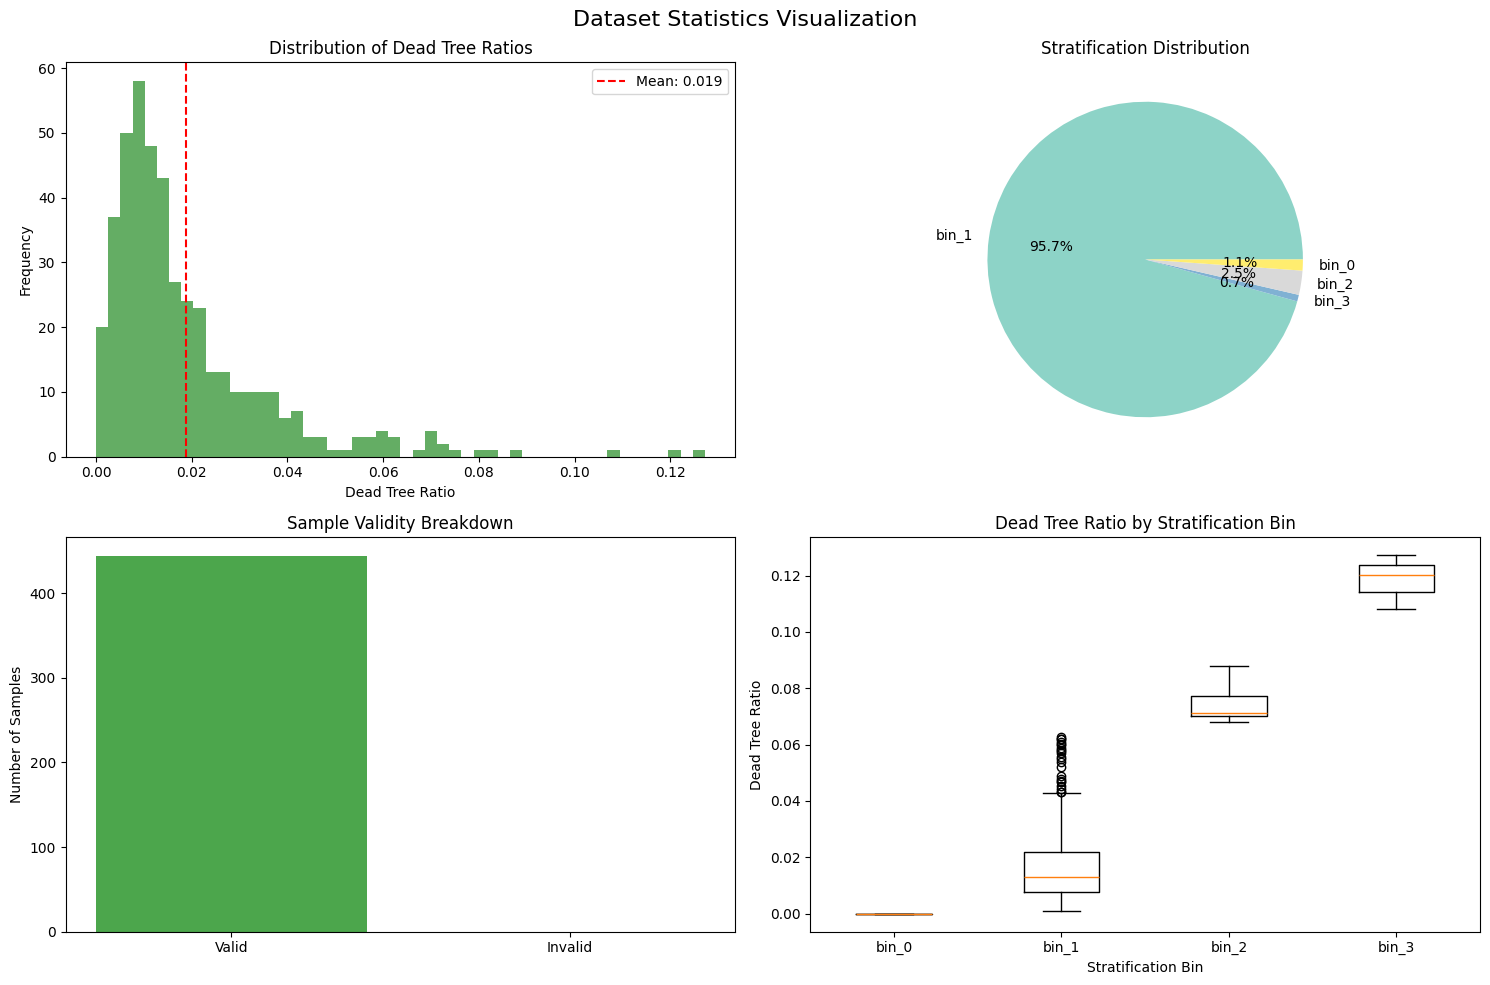

In [7]:
# Visualize dataset statistics
import matplotlib.pyplot as plt

# Generate statistical charts (display in notebook)
preprocessor.visualize_statistics()

# To save charts to file, use:
# preprocessor.visualize_statistics(save_path="dataset_statistics.png")

=== Sample Visualization ===
Showing random samples from different stratification bins...


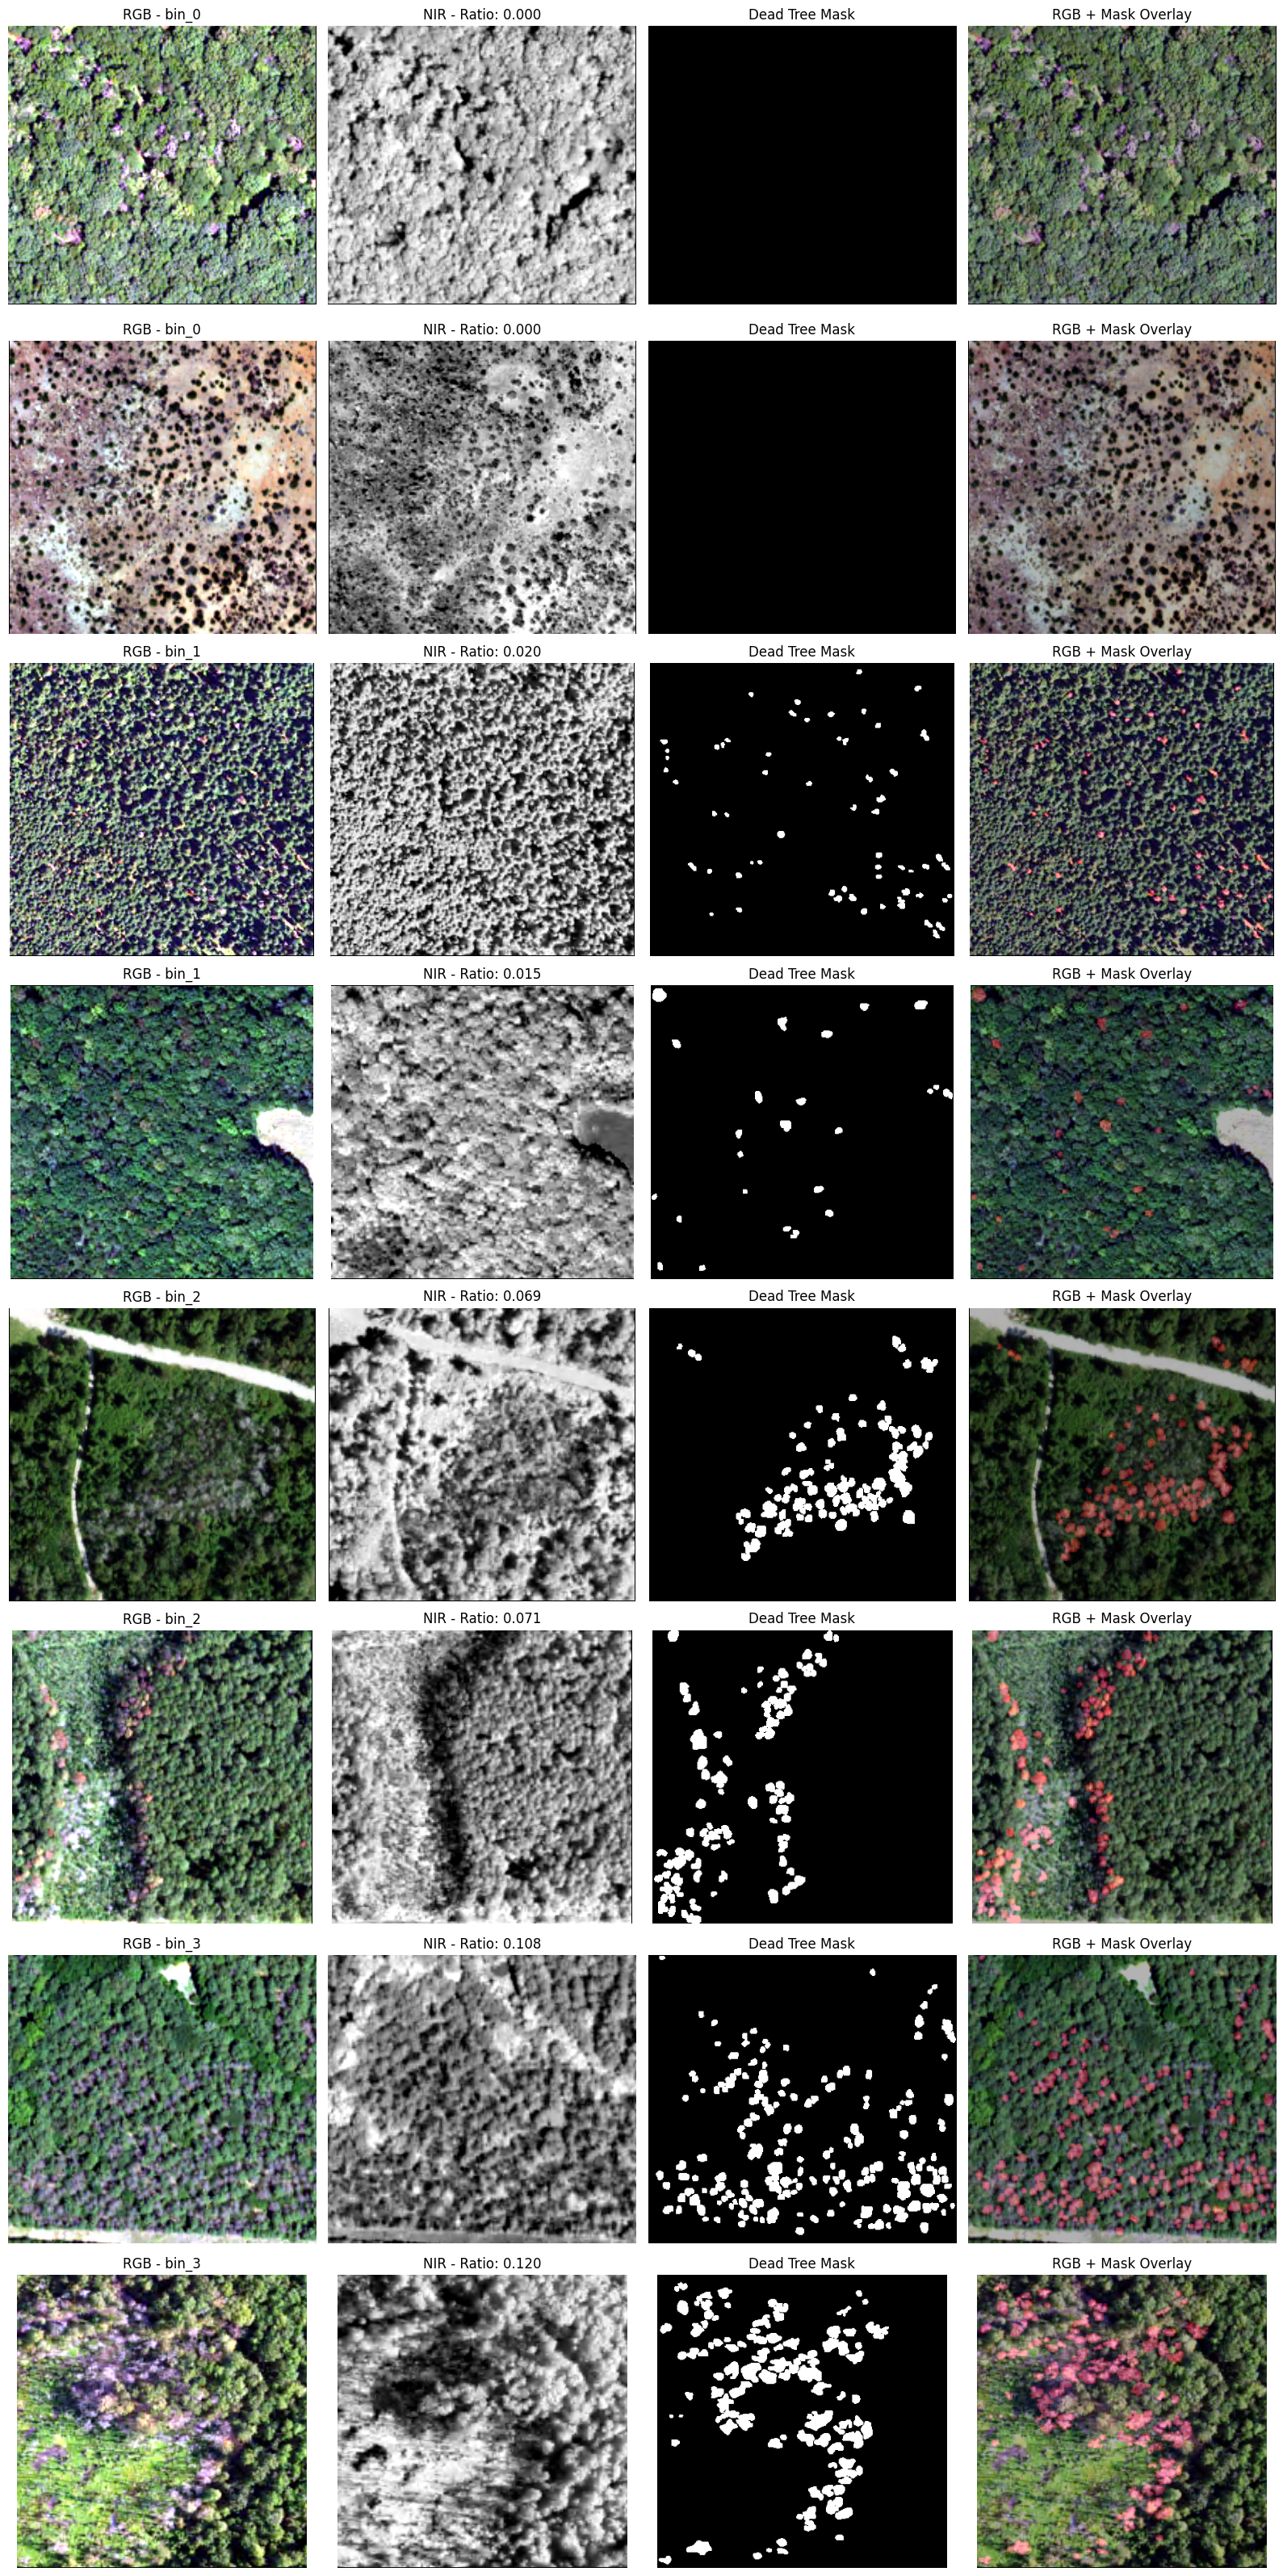

In [8]:
# Visualize random samples from different stratification bins
print("=== Sample Visualization ===")
print("Showing random samples from different stratification bins...")

# Display samples in notebook
preprocessor.visualize_random_samples(num_samples=8)

# To save sample images to file, use:
# preprocessor.visualize_random_samples(num_samples=8, save_path="sample_examples.png")

In [9]:
# Detailed analysis of stratification distribution
import numpy as np
import pandas as pd

print("=== Detailed Stratification Distribution Analysis ===")

# Create DataFrame for stratification distribution
stratification_data = []
for i, (ratio, label) in enumerate(zip(preprocessor.dead_tree_ratios, preprocessor.stratification_labels)):
    stratification_data.append({
        'sample_index': i,
        'dead_tree_ratio': ratio,
        'stratification_bin': label,
        'base_name': preprocessor.sample_list[i]['base_name']
    })

df = pd.DataFrame(stratification_data)

# Display statistics by stratification bin
print("\nStatistics for each stratification bin:")
for bin_name in sorted(df['stratification_bin'].unique()):
    bin_data = df[df['stratification_bin'] == bin_name]
    print(f"\n{bin_name}:")
    print(f"  Number of samples: {len(bin_data)}")
    print(f"  Dead tree ratio range: {bin_data['dead_tree_ratio'].min():.4f} - {bin_data['dead_tree_ratio'].max():.4f}")
    print(f"  Mean dead tree ratio: {bin_data['dead_tree_ratio'].mean():.4f}")
    print(f"  Standard deviation: {bin_data['dead_tree_ratio'].std():.4f}")

# Display stratification distribution table
print("\nStratification distribution summary:")
print(df['stratification_bin'].value_counts().sort_index())

=== Detailed Stratification Distribution Analysis ===

Statistics for each stratification bin:

bin_0:
  Number of samples: 5
  Dead tree ratio range: 0.0000 - 0.0000
  Mean dead tree ratio: 0.0000
  Standard deviation: 0.0000

bin_1:
  Number of samples: 425
  Dead tree ratio range: 0.0011 - 0.0626
  Mean dead tree ratio: 0.0170
  Standard deviation: 0.0130

bin_2:
  Number of samples: 11
  Dead tree ratio range: 0.0680 - 0.0880
  Mean dead tree ratio: 0.0744
  Standard deviation: 0.0065

bin_3:
  Number of samples: 3
  Dead tree ratio range: 0.1083 - 0.1272
  Mean dead tree ratio: 0.1186
  Standard deviation: 0.0096

Stratification distribution summary:
stratification_bin
bin_0      5
bin_1    425
bin_2     11
bin_3      3
Name: count, dtype: int64


In [10]:
# Analyze stratification distribution in cross-validation splits
print("=== Cross-Validation Split Stratification Analysis ===")

# Analyze stratification distribution in each fold
for fold_idx, fold_info in enumerate(splits['cv_splits']):
    print(f"\nFold {fold_idx + 1}:")
    
    # Get stratification labels for training and validation sets
    train_indices = fold_info['train_indices']
    val_indices = fold_info['val_indices']
    
    train_labels = [preprocessor.stratification_labels[i] for i in train_indices]
    val_labels = [preprocessor.stratification_labels[i] for i in val_indices]
    
    # Calculate distribution statistics
    train_dist = pd.Series(train_labels).value_counts().sort_index()
    val_dist = pd.Series(val_labels).value_counts().sort_index()
    
    print("  Training set stratification distribution:")
    for bin_name, count in train_dist.items():
        percentage = count / len(train_labels) * 100
        print(f"    {bin_name}: {count} samples ({percentage:.1f}%)")
    
    print("  Validation set stratification distribution:")
    for bin_name, count in val_dist.items():
        percentage = count / len(val_labels) * 100
        print(f"    {bin_name}: {count} samples ({percentage:.1f}%)")

# Test set stratification distribution
test_labels = [preprocessor.stratification_labels[i] for i in splits['test_indices']]
test_dist = pd.Series(test_labels).value_counts().sort_index()

print(f"\nTest set stratification distribution:")
for bin_name, count in test_dist.items():
    percentage = count / len(test_labels) * 100
    print(f"  {bin_name}: {count} samples ({percentage:.1f}%)")

=== Cross-Validation Split Stratification Analysis ===

Fold 1:
  Training set stratification distribution:
    bin_0: 3 samples (1.1%)
    bin_1: 272 samples (95.8%)
    bin_2: 8 samples (2.8%)
    bin_3: 1 samples (0.4%)
  Validation set stratification distribution:
    bin_0: 1 samples (1.4%)
    bin_1: 68 samples (95.8%)
    bin_2: 1 samples (1.4%)
    bin_3: 1 samples (1.4%)

Fold 2:
  Training set stratification distribution:
    bin_0: 4 samples (1.4%)
    bin_1: 272 samples (95.8%)
    bin_2: 7 samples (2.5%)
    bin_3: 1 samples (0.4%)
  Validation set stratification distribution:
    bin_1: 68 samples (95.8%)
    bin_2: 2 samples (2.8%)
    bin_3: 1 samples (1.4%)

Fold 3:
  Training set stratification distribution:
    bin_0: 3 samples (1.1%)
    bin_1: 272 samples (95.8%)
    bin_2: 7 samples (2.5%)
    bin_3: 2 samples (0.7%)
  Validation set stratification distribution:
    bin_0: 1 samples (1.4%)
    bin_1: 68 samples (95.8%)
    bin_2: 2 samples (2.8%)

Fold 4:
  Traini

In [ ]:
# Save preprocessing configuration 
# print("=== Save Configuration ===")
# config_path = "preprocessing_config.json"
# preprocessor.save_preprocessing_config(config_path)
# print(f"Configuration saved to: {config_path}")

# # View detailed information for a single sample 
# print("\n=== Individual Sample Details ===")
# sample_idx = 0
# if len(preprocessor.sample_list) > sample_idx:
#     sample_info = preprocessor.sample_list[sample_idx]
#     print(f"Sample {sample_idx}:")
#     print(f"  Filename: {sample_info['base_name']}")
#     print(f"  Image dimensions: {sample_info['image_shape']}")
#     print(f"  Dead tree ratio: {sample_info['dead_tree_ratio']:.4f}")
#     print(f"  Stratification label: {preprocessor.stratification_labels[sample_idx]}")
#     print(f"  RGB path: {sample_info['rgb_path']}")
#     print(f"  NRG path: {sample_info['nrg_path']}")
#     print(f"  Mask path: {sample_info['mask_path']}")

# print("\nDataset analysis and visualization completed!")